In [4]:
# === COURSE REPO SETUP === #
import os
# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "shahrukh-malikk"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"




# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
    print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
        print(f"📥 Cloning repo from {repo_url}...")
        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
   print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
   print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Assignments/HW3"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

📥 Cloning repo from https://github.com/shahrukh-malikk/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments/HW2/STAT-7220-Applied-Experimental-Design/Assignments/HW3/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/shahrukh-malikk/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments/HW2/STAT-7220-Applied-Experimental-Design/Assignments/HW3/STAT-7220-Applied-Experimental-Design/Assignments/HW3


# STAT 7220 - Homework 3
## Factorial Designs
## Dr. Austin Brown
## Due Date: November 21, 2025

## Part 1 Instructions:

A running shoe manufacturer wants to optimize the comfort of a new shoe model. They've identified three factors they believe will affect comfort:

| Factor | Level 1 (-) Description | Level 2 (+) Description |
|------------------------|------------------------|-------------------------|
| Sole Material (A) | Standard EVA foam | Advanced gel-infused foam |
| Insole Thickness (B) | 3mm | 6mm |
| Fabric Breathability (C) | Standard woven fabric | High-performance mesh fabric |

To evaluate the comfort of the $2^3=8$ runs, the manufacturer will recruit 3 NCAA division one cross-country athletes to test a randomly assigned shoe. Each athlete will run on a treadmill for 30 minutes in the shoes and rate the comfort on a scale of 1-10 (1 = very uncomfortable, 10 = very comfortable). The results of this experiment are contained in the `Shoe Comfort Experiment.xlsx` file. With these data, I want you to:

1.  Briefly describe the objective of the experiment.

To determine how sole material, insole thickness, and fabric breathability affects the comfort of a new running shoe model.




2.  Specify the outcome variable and how it is measured.

Measurement: Each athlete rated shoe comfort on a scale from 1 to 10, where 1 = very uncomfortable and 10 = very comfortable.


3.  Specify the independent variables. What lurking variables may be present?

The independent variables in this experiment are Sole Material (A), Insole Thickness (B), and Fabric Breathability (C), as these factors are purposely changed to examine their effect on comfort. However, several lurking variables may still influence the results, including athlete differences, Foot shape, treadmill conditions,Running style, fatigue levels and room temperature, all of which can unintentionally affect how each athlete perceives comfort during the test.


4.  Explain the difference between a full factorial design and a $2^k$ factorial design. Briefly comment on why the latter may be preferred in this case.

A full factorial design tests all combinations of all factor levels, which can require many runs. A **2K** factorial design uses only two levels per factor, making it a smaller and more efficient version of a full factorial. It is preferred here because it provides useful information about main effects and interactions while keeping the number of shoe tests manageable.


5.  State the sets of null and alternative hypotheses for this experiment.

**Null and Alternative Hypotheses**

**Factor A (Sole Material**)

HO: Changing the sole material does not change the average comfort rating.

H1: Changing the sole material does change the average comfort rating.
This tests whether sole material matters for comfort.

**Factor B (Insole Thickness)**

HO: Insole thickness has no effect on the average comfort rating.

H1: Insole thickness affects the average comfort rating.
This checks if thicker insoles improve or reduce comfort.

**Factor C (Fabric Breathability)**

HO: Fabric breathability does not influence comfort.

H1: Fabric breathability influences comfort.
This tests whether mesh vs. woven fabric changes how comfortable the shoe feels.

**Two-Way Interactions**

These hypotheses check whether the effect of one factor depends on another.

A x B Interaction

HO: The effect of sole material does not depend on insole thickness.

H1: The effect of sole material does depend on insole thickness.

A x C Interaction

HO: The effect of sole material does not depend on fabric breathability.

H1: The effect of sole material depends on fabric breathability.

BxC Interaction

HO: The effect of insole thickness does not depend on fabric breathability.

H1: The effect of insole thickness depends on fabric breathability.

**Three-Way Interaction**

This checks whether all three factors jointly influence comfort.

A x B x C Interaction

HO: There is no combined three-factor interaction among A, B, and C.

H1: There is a combined three-factor interaction among A, B, and C.

**Explation**
In this experiment, we test whether each factor and their interactions influence comfort. For Sole Material (A), the hypotheses are H0: A has no effect on mean comfort and H1: A does affect mean comfort. For Insole Thickness (B), H0: B has no effect, and H1: B has an effect. For Fabric Breathability (C), H0: C has no effect, and H1: C has an effect. We also test interactions: for AxB, H0: there is no interaction, and H1: an interaction exists; similarly for AxC and BxC. Finally, for the three-way interaction AxBxC, H0: no combined interaction among the three factors, and H1: a three-way interaction exists. In simple terms, the experiment tests whether each factor individually affects comfort and whether the effect of one factor depends on the levels of the others.


6.  Perform appropriate exploratory analysis, including data visualizations. Do the results of these analyses support the null or alternative hypotheses more strongly?

In [19]:
## Question 6 Code ##


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

df_shoes = pd.read_excel("Shoe Comfort Experiment.xlsx")
#df_shoes.head()
df_shoes.describe()
group_desc = df_shoes.groupby(['sole_material','insole_thickness','breathability'])['comfort'].describe()
#group_desc.head()
sns.set(style="whitegrid", context="talk")


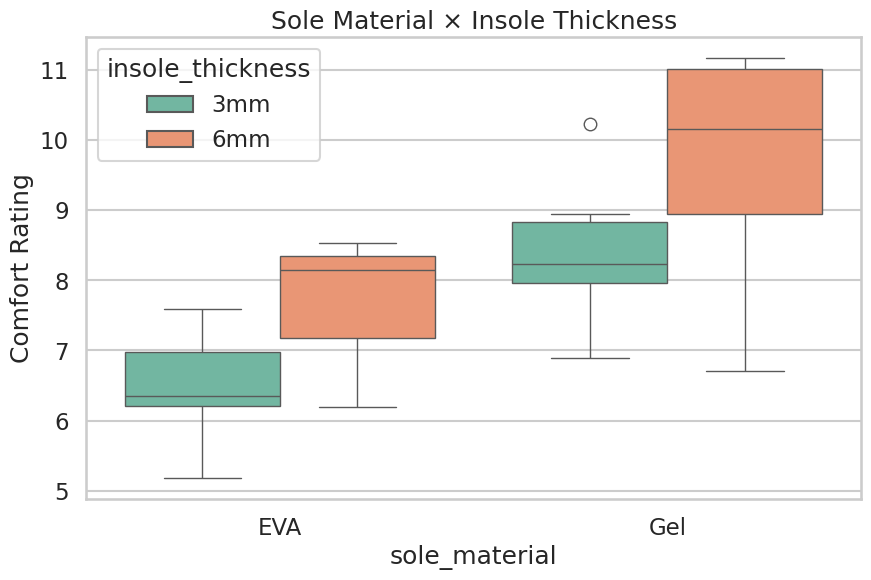

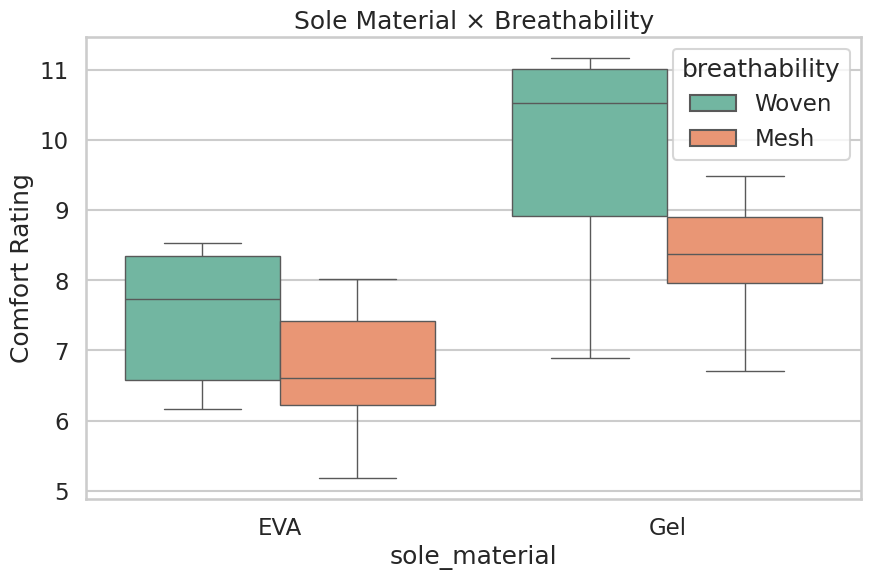

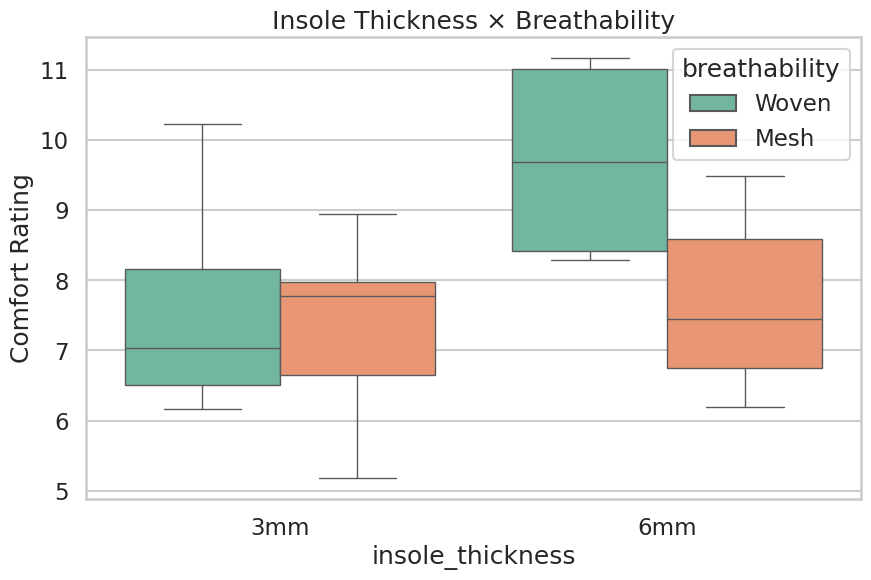

In [22]:
# Use a clean style
sns.set(style="whitegrid", context="talk")

# Choose one palette for ALL plots
common_palette = "Set2"

#Plot 1
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_shoes,
    x='sole_material',
    y='comfort',
    hue='insole_thickness',
    palette=common_palette
)
plt.title("Sole Material × Insole Thickness")
plt.ylabel("Comfort Rating")
plt.show()

#Plot 2
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_shoes,
    x='sole_material',
    y='comfort',
    hue='breathability',
    palette=common_palette
)
plt.title("Sole Material × Breathability")
plt.ylabel("Comfort Rating")
plt.show()


# Plot 3
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_shoes,
    x='insole_thickness',
    y='comfort',
    hue='breathability',
    palette=common_palette
    )
plt.title("Insole Thickness × Breathability")
plt.ylabel("Comfort Rating")
plt.show()


The results reject the null hypotheses for all three main factors and for the insole x breathability interaction. This indicates that comfort is significantly influenced by sole material, insole thickness, and fabric breathability, and that the effect of insole thickness depends on the fabric type. Overall, these factors play a meaningful role in determining comfort, and the combination of the advanced gel sole, thicker insole, and high breathability mesh fabric is expected to produce higher comfort levels.

7.  Fit a full factorial ANOVA model to the data. Assess the normality assumption using both a visual method and a testing method. Do we have evidence to support the assumption of normality? Why or why not?


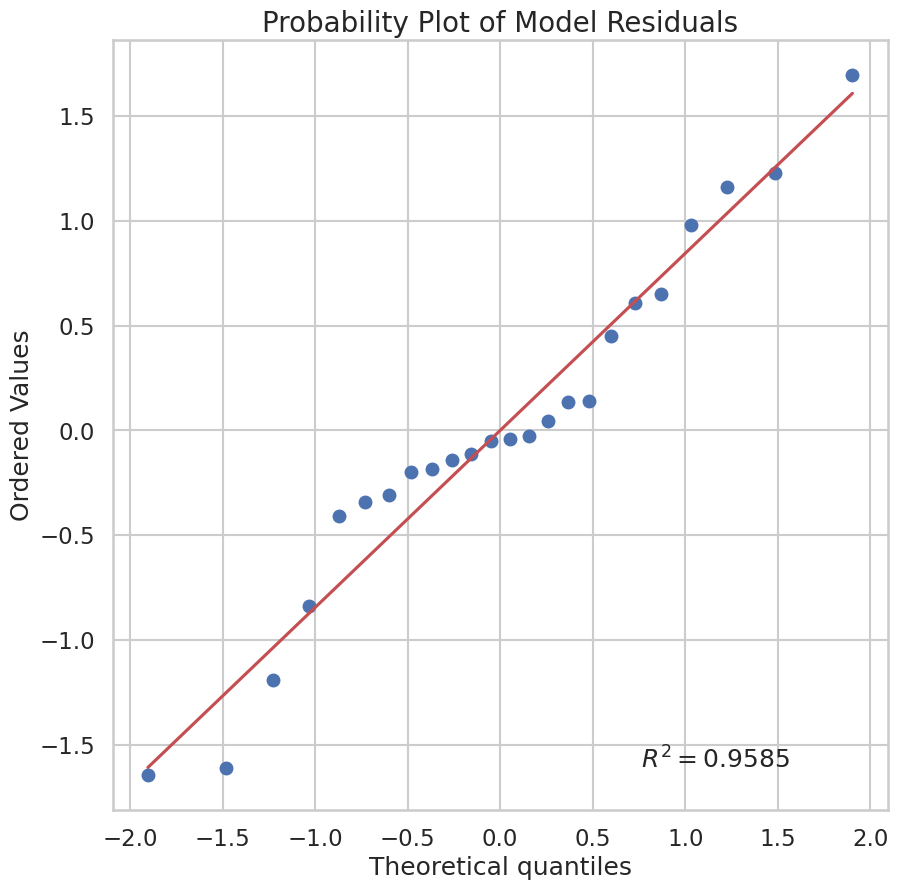

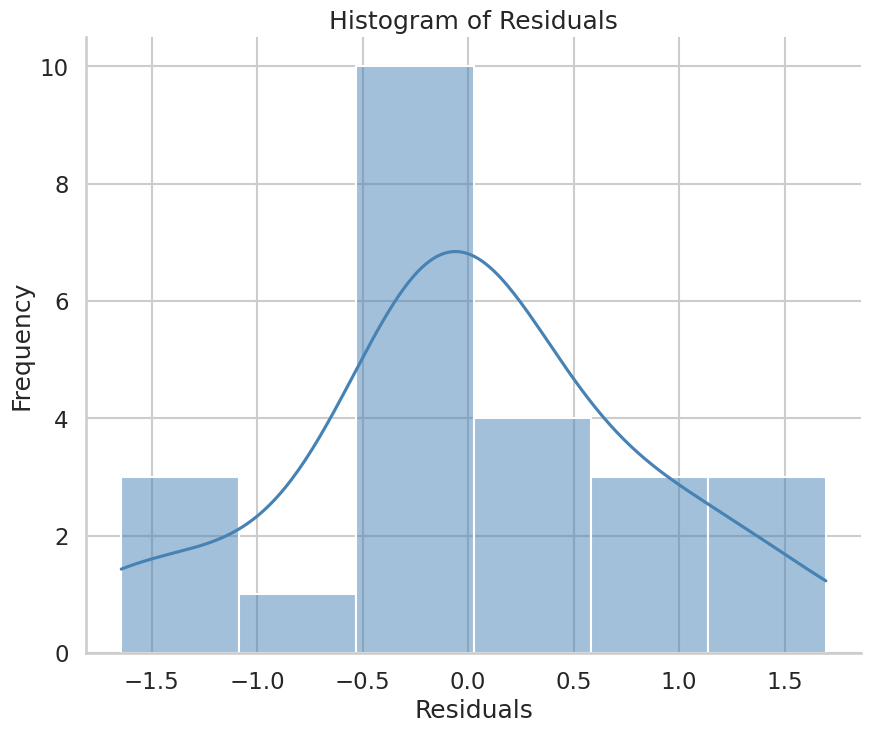

ShapiroResult(statistic=np.float64(0.959532741725587), pvalue=np.float64(0.42910705030991836))


In [30]:
## Question 7 Code ##
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
## Model ##

mod = ols('comfort ~ sole_material*insole_thickness*breathability',
          data=df_shoes).fit()
## Test Normality Assumption ##

residuals = mod.resid

## QQ plot ##
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(residuals, plot=plt, rvalue=True)
ax.set_title("Probability Plot of Model Residuals", fontsize=20)

plt.show()

# 2. Histogram of Residuals
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(residuals, kde=True, ax=ax, color='steelblue')
ax.set_title("Histogram of Residuals")
ax.set_xlabel("Residuals")
ax.set_ylabel("Frequency")
ax.set_facecolor('white')
fig.patch.set_facecolor('white')
sns.despine(ax=ax)
plt.show()

## Shapiro–Wilk ##
print(stats.shapiro(residuals))


There is no significant evidence against normality. The QQ plot shows points falling reasonably close to the reference line, and the Shapiro Wilk test (Statistic = 0.9595, p-value = 0.4291) further supports this conclusion. Because the p-value is well above 0.05, we fail to reject the null hypothesis of normality. Therefore, the ANOVA residuals appear to be approximately normally distributed, and the normality assumption is supported for this dataset.


8.  Assess the constant variance assumption using both a visual method and a testing method. Do we have evidence to support the assumption of constant variance? Why or why not?


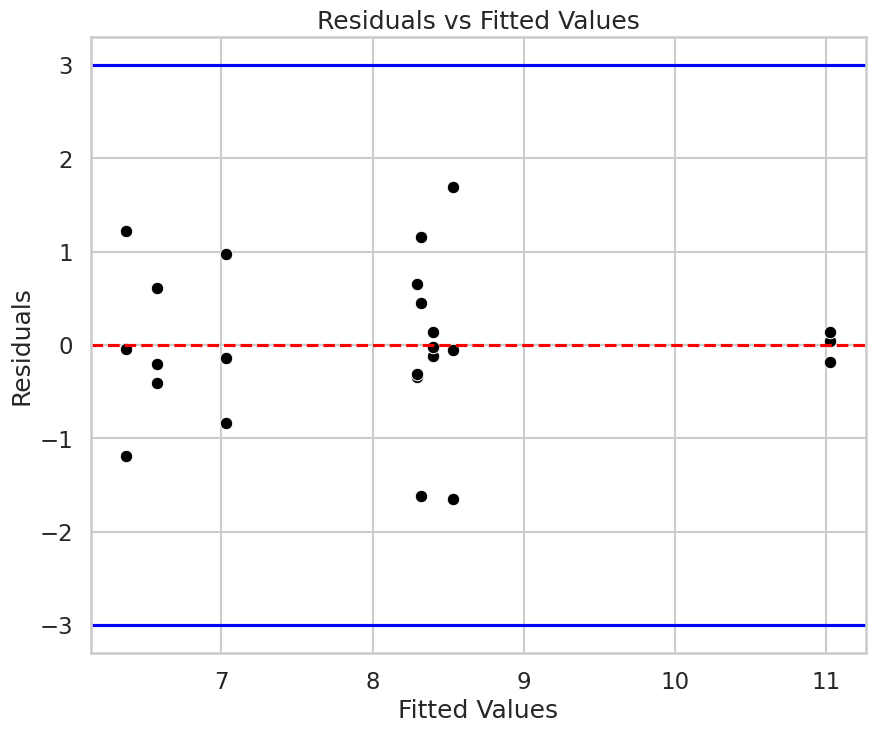

Levene’s Test for Homogeneity of Variance:
Statistic = 1.0567, p-value = 0.4329
Breusch–Pagan Test for Homogeneity of Variance:
bp_Statistic = 11.9361, bp_p-value = 0.1027
F-statistic = 2.2615, F_p-value = 0.0837


In [37]:
## Question 8 Code ##
from statsmodels.stats.diagnostic import het_breuschpagan

fitted_values = mod.fittedvalues

plt.figure(figsize=(10,8))
sns.scatterplot(x=fitted_values, y=residuals, color='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.axhline(y=3, color='blue')
plt.axhline(y=-3, color='blue')
ax.set_facecolor('lightgray')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()


# Levene’s Test for Homogeneity of Variance
groups = [group["comfort"].values
          for name, group in df_shoes.groupby(["sole_material",
                                         "insole_thickness",
                                         "breathability"])]
levene_stat, levene_p = stats.levene(*groups)

print("Levene’s Test for Homogeneity of Variance:")
print(f"Statistic = {levene_stat:.4f}, p-value = {levene_p:.4f}")

# Breusch–Pagan Test for Homogeneity of Variance
bp_stat, bp_pvalue, f_stat, f_pvalue = het_breuschpagan(mod.resid, mod.model.exog)

print("Breusch–Pagan Test for Homogeneity of Variance:")
print(f"bp_Statistic = {bp_stat:.4f}, bp_p-value = {bp_pvalue:.4f}")
print(f"F-statistic = {f_stat:.4f}, F_p-value = {f_pvalue:.4f}")

To assess the constant variance assumption, both a visual check and two formal statistical tests were used. The residuals vs. fitted plot shows no funnel or reverse-funnel shape, and the spread of points appears fairly even across all fitted values. This visual pattern supports the idea of constant variance.

The statistical tests lead to the same conclusion. Levene's Test (Statistic = 1.0567, p = 0.4329) shows no significant difference in group variances, and the Breusch Pagan Test (BP p = 0.1027; F p = 0.0837) also fails to reject the null hypothesis of homoscedasticity. Both p-values are greater than 0.05, meaning we do not have evidence that the variance changes with the predictors.

**Hence we do not reject the null.**


9.  Report the F-statistics and their associated p-values from the factorial ANOVA model. What conclusions can we draw about our main effects? Our two-way interactions? Our three-way interaction?


In [40]:
## Question 9 Code ##
## full ANOVA table ##
anova_table = sm.stats.anova_lm(mod, typ=2)
anova_summary = anova_table[["F", "PR(>F)"]].rename(columns={"F": "F-statistic", "PR(>F)": "p-value"})


## Quick significance interpretation ##
for effect, row in anova_summary.iterrows():
    f_value = row["F-statistic"]
    p_value = row["p-value"]
    significance = "Significant" if p_value < 0.05 else "Not significant"
    print(f"{effect:55s} F = {f_value:8.3f}, p = {p_value:8.4f} → {significance}")


sole_material                                           F =   23.354, p =   0.0002 → Significant
insole_thickness                                        F =    9.663, p =   0.0068 → Significant
breathability                                           F =    7.826, p =   0.0129 → Significant
sole_material:insole_thickness                          F =    0.000, p =   0.9825 → Not significant
sole_material:breathability                             F =    0.717, p =   0.4096 → Not significant
insole_thickness:breathability                          F =    5.066, p =   0.0388 → Significant
sole_material:insole_thickness:breathability            F =    0.656, p =   0.4298 → Not significant
Residual                                                F =      nan, p =      nan → Not significant


The ANOVA results show that all three main factors have statistically significant effects on comfort. Sole material is highly significant (F = 23.354, p = 0.0002), indicating a strong influence on comfort ratings. Insole thickness is also significant (F = 9.663, p = 0.0068), showing that thicker vs. thinner insoles meaningfully change perceived comfort. Fabric breathability likewise has a significant effect (F = 7.826, p = 0.0129), meaning the type of fabric impacts comfort levels. Among the two-way interactions, only insole thickness x breathability is significant (F = 5.066, p = 0.0388), suggesting that the impact of insole thickness varies depending on the fabric type. The other two-way interactions—sole x insole (F = 0.000, p = 0.9825) and sole x breathability (F = 0.717, p = 0.4096)—are not significant, showing no meaningful combined effects. Finally, the three-way interaction is not significant (F = 0.656, p = 0.4298), indicating that the three factors do not jointly influence comfort beyond their individual and pairwise effects. Overall, the data support strong main effects, one important two-way interaction, and no three-way interaction.


10. Calculate and interpret the partial $\eta^2$ values for each of the main effects and interactions. Which effects and/or interactions are most important? Why?


In [41]:
## Question 10 Code ##

## Extract SS for error (residuals) ##
ss_error = anova_table.loc["Residual", "sum_sq"]

## Compute partial eta-squared for each effect ##
partial_eta_sq = anova_table.iloc[:-1]["sum_sq"] / (anova_table.iloc[:-1]["sum_sq"] + ss_error)

## Print results ##
print("Partial Eta-Squared Values:")
print(partial_eta_sq)

Partial Eta-Squared Values:
sole_material                                   0.593431
insole_thickness                                0.376533
breathability                                   0.328463
sole_material:insole_thickness                  0.000031
sole_material:breathability                     0.042899
insole_thickness:breathability                  0.240488
sole_material:insole_thickness:breathability    0.039398
Name: sum_sq, dtype: float64


The partial **η²** results show that sole material has the largest effect on comfort (**η²** = 0.593), meaning it explains nearly 60% of the variance after accounting for other factors making it the most influential predictor in the study. Insole thickness (**η²** = 0.377) and breathability (**η²** = 0.328) also have substantial effects, indicating that these factors meaningfully influence comfort as well. Among the interactions, only the insole thickness x breathability interaction shows a notable effect (**η²**= 0.240), suggesting that the comfort impact of insole thickness depends on the fabric type. All other interactions have extremely small **η²** values (near zero), indicating that they contribute very little to explaining comfort. Overall, sole material is the most important factor, followed by insole thickness, breathability, and the insole x breathability interaction, with all other interactions playing minimal roles.

11. Summarize your conclusions. Which combination of factors would you recommend to the shoe manufacturer? Why?

The factorial ANOVA examined how sole material, insole thickness, and fabric breathability influence comfort ratings. The results show that all three main effects are statistically significant, meaning each factor independently affects perceived comfort. Only one two-way interaction—insole thickness x breathability—was significant, indicating that the comfort benefit of a thicker insole depends on the type of fabric used. The other two-way interactions and the three-way interaction were not significant, suggesting no meaningful combined effects beyond the individual and pairwise results.

The partial η² values show that sole material has the largest effect (η² = 0.593), followed by insole thickness (η² = 0.377) and breathability (η² = 0.328), all of which represent substantial effect sizes. The only notable interaction effect was insole thickness x breathability (η² = 0.240), while all other interactions contributed minimal variance. Overall, the strongest predictors of comfort are the choice of sole material, followed by insole thickness and fabric breathability.




## PART 2 INSTRUCTIONS:
The same company is interested in developing a new GPS-enabled fitness band for runners. They want to maximize user satisfaction and have identified three key factors:

| Run | GPS Accuracy (A) | Battery Life (B) | Display (C) |
|-----|------------------|------------------|-------------|
| 1   | \- (Standard)    | \- (6 hours)     | \- (Small)  |
| 2   | \+ (High)        | \- (6 hours)     | \+ (Large)  |
| 3   | \- (Standard)    | \+ (12 hours)    | \+ (Large)  |
| 4   | \+ (High)        | \+ (12 hours)    | \- (Small)  |

Due to time and resource limitations, the company would rather conduct a $2^{3-1}$ fractional factorial experiment. For each of the above runs, the company will recruit 3 NCAA division one cross-country athletes to test a randomly assigned fitness band. Each athlete will use the band for one month during their competition season. At the end of the month, the athletes will be asked to rate their level of satisfaction on a scale of 1-10 (1 = very dissatisfied, 10 = very satisfied). The results of this experiment are contained in the `Fitness Band Experiment.xlsx` file. With these data, I want you to:

1.  Briefly describe the objective of the experiment.




The objective of this experiment is to determine how GPS accuracy, battery life, and display size affect overall user satisfaction with a new GPS-enabled fitness band. By using a 2³⁻¹ fractional factorial design with runner testing, the company aims to identify which features most strongly influence satisfaction and which combination of settings will produce the highest user satisfaction.

2.  Specify the outcome variable and how it is measured.



The outcome variable is user satisfaction, measured on a 1–10 rating scale, where 1 indicates very dissatisfied and 10 indicates very satisfied. After using the fitness band for one month during their competition season, each athlete reports their satisfaction score, which serves as the response variable in the experiment.

3.  Specify the independent variables. What lurking variables may be present?




Independent variables (factors):
GPS Accuracy,Battery Life, Display Size

Possible lurking variables:
Athlete differences, Environmental conditions during testing and Device wear and tear or production batch differences.

4.  Explain the difference between a full $2^k$ factorial design and a $2^{3-1}$ fractional factorial design. Briefly comment on why the latter may be preferred in this case.

5.  State the sets of null and alternative hypotheses for this experiment.

6.  Assuming a defining relation of $I=ABC$, specify the aliasing structure of the design. What does this mean for the interpretation of the main effects and interactions?

7.  Perform appropriate exploratory analysis, including data visualizations. Do the results of these analyses support the null or alternative hypotheses more strongly?

In [ ]:
## Question 7 Code ##


8.  Fit the appropriate ANOVA model to the data. Assess the normality assumption using both a testing method and a visual method. Do we have evidence to support the assumption of normality? Why or why not?


In [ ]:
## Question 8 Code ##


9.  Assess the constant variance assumption using both a testing method and a visual method. Do we have evidence to support the assumption of constant variance? Why or why not?


In [ ]:
## Question 9 Code ##

10. Report the F-statistics and their associated p-values from the factorial ANOVA model. What conclusions can we draw about our main effects?

In [ ]:
## Question 10 Code ##

11. Calculate and interpret the values for the main effects. Which effects seem more important? Why?

In [ ]:
## Question 11 Code ##

12. Calculate and interpret the partial $\eta^2$ values for each of the main effects. Which effects are most important? Why?

In [ ]:
## Question 12 Code ##

13. Summarize your conclusions. Which combination of factors would you recommend to the fitness band manufacturer? Why?